In [8]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
options(repr.plot.width=10, repr.plot.height=5)

In [20]:
d <- data.frame(
    x          = c(   2,    4,    6,    8,   10,   20,   50,  100),
    finetuned  = c(3.91, 3.81, 3.77, 3.81, 3.68, 3.47, 3.41, 3.38),
    supervised = c(9.34, 7.55, 6.70, 6.20, 5.53, 5.00, 4.50, 4.30),
    frozen     = c(5.09, 4.90, 4.82, 4.85, 4.71, 4.76, 4.59, 4.55)
)

d

x,finetuned,supervised,frozen
<dbl>,<dbl>,<dbl>,<dbl>
2,3.91,9.34,5.09
4,3.81,7.55,4.90
6,3.77,6.70,4.82
8,3.81,6.20,4.85
10,3.68,5.53,4.71
20,3.47,5.00,4.76
50,3.41,4.50,4.59
100,3.38,4.30,4.55


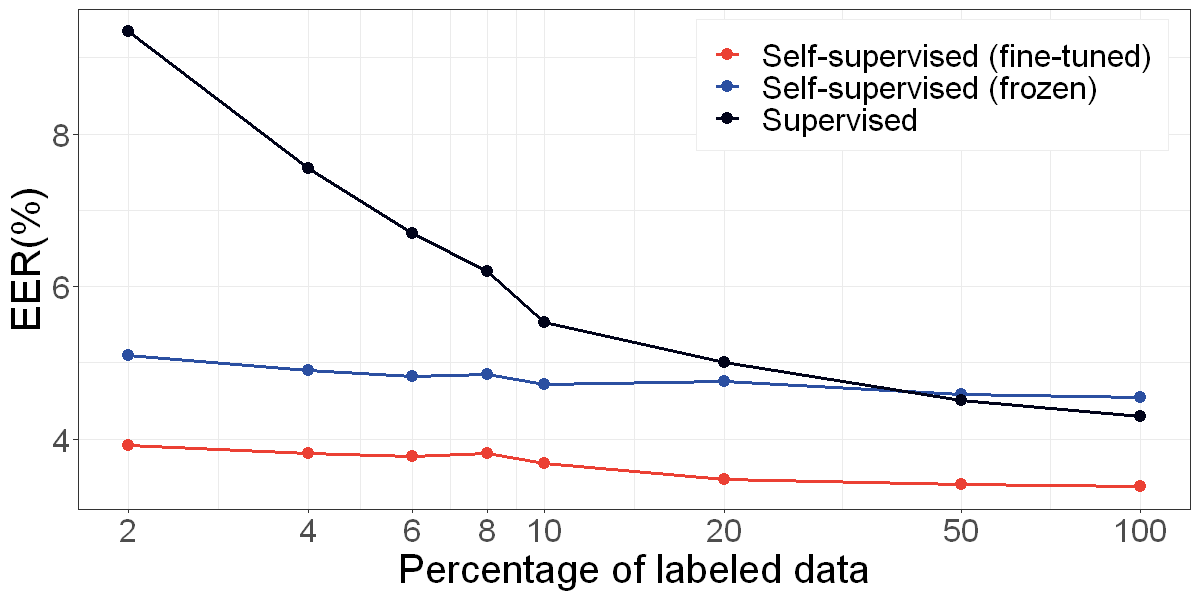

In [21]:
d %>% ggplot(aes(x=x, group=1)) +
        geom_line(aes(y=finetuned, color="Self-supervised (fine-tuned)"), linewidth=1) +
        geom_line(aes(y=frozen, color="Self-supervised (frozen)"), linewidth=1) +
        geom_line(aes(y=supervised, color="Supervised"), linewidth=1) +

        geom_point(aes(y=finetuned, color="Self-supervised (fine-tuned)"), size=3) +
        geom_point(aes(y=frozen, color="Self-supervised (frozen)"), size=3) +
        geom_point(aes(y=supervised, color="Supervised"), size=3) +
        
        scale_colour_manual(values=c("#eb4034", "#2b4fa1", "#01041a")) +

        xlab("Percentage of labeled data") +
        ylab("EER(%)") +
        theme_bw() +
        theme(text = element_text(size=24)) +
        
        theme(
            legend.title=element_blank(),
            legend.position = c(0.98, 0.98),
            legend.justification = c("right", "top"),
            legend.box.just = "right",
            legend.margin = margin(0, 10, 10, 10),
            legend.background = element_rect(color='#ededed', fill='white', linetype='solid')
        ) +
        scale_x_continuous(breaks=x, trans='log10')

In [13]:
ggsave(filename = "label_efficient.pdf", width=10, height=5, device=cairo_pdf)